In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys


from collections import namedtuple

%matplotlib inline

from evaluation_RBF import *
from policy_search_RBF import *


#import environment
sys.path.append(r'../virl')
import virl

import time
from datetime import date

In [2]:
def env_test(env, path):
    observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(observation_examples)
    
    feature_transformer = sklearn.pipeline.FeatureUnion([
        ("rbf1", RBFSampler(gamma=5.0, n_components=100)),
        ("rbf2", RBFSampler(gamma=2.0, n_components=100)),
        ("rbf3", RBFSampler(gamma=1.0, n_components=100)),
        ("rbf4", RBFSampler(gamma=0.5, n_components=100))
        ])
    feature_transformer.fit(scaler.transform(observation_examples))
    
    approximator = FunctionApproximator(env, scaler,feature_transformer, eta0= 0.00, learning_rate= "constant", read_approximator = path)
    
    # Training part
    stats = reinforce(env, approximator, 250, use_training=False, epsilon = 0)
    
    return stats

In [3]:
count = 1

for index in range(count):
    
    path = ["./data{}/model0".format(index), 
            "./data{}/model1".format(index),
            "./data{}/model2".format(index),
            "./data{}/model3".format(index)]
    
    env = virl.Epidemic(problem_id = count, noisy = False, stochastic = False)
    
    stats_test = env_test(env, path)
    # save
    save_stats = Save_stats(stats_test)
    file = open('./data{}/stats_test_FF'.format(index), 'wb')
    pickle.dump(save_stats, file)
    file.close()
    
    
    env = virl.Epidemic(problem_id = count, noisy = True, stochastic = False)
    stats_test = env_test(env, path)
    # save
    save_stats = Save_stats(stats_test)
    file = open('./data{}/stats_test_TF'.format(index), 'wb')
    pickle.dump(save_stats, file)
    file.close()
    
    
    env = virl.Epidemic(problem_id = count, noisy = False, stochastic = True)
    stats_test = env_test(env, path)
    # save
    save_stats = Save_stats(stats_test)
    file = open('./data{}/stats_test_FT'.format(index), 'wb')
    pickle.dump(save_stats, file)
    file.close()
    
    
    env = virl.Epidemic(problem_id = count, noisy = True, stochastic = True)
    stats_test = env_test(env, path)
    # save
    save_stats = Save_stats(stats_test)
    file = open('./data{}/stats_test_TT'.format(index), 'wb')
    pickle.dump(save_stats, file)
    file.close()


Step 51 @ Episode 250/250 (-2.231471058513101)))

### Plot the stats_test

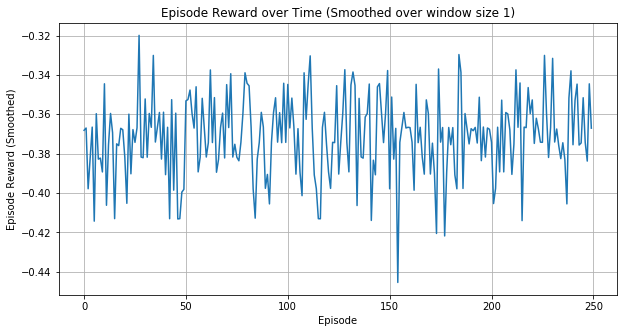

In [9]:
from evaluation_RBF import *

for i in range(1):
    file_stats = open('./data{}/stats_test_TF'.format(i), 'rb')
    stats_test = pickle.load(file_stats)
    plot_stats = Plot_stats(stats_test)
    plot_stats.plot_stats_test(smoothing_window = 1)
    
